## Problem statement

University admissions can be confusing and stressful. Most of the times, in order to know the status of admission it can take up a lot of time.

In this kernel, we will try to explore how we can maximize the Chance of Admit by focussing only on the most prominent factors.

## Importing necessary libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
warnings.filterwarnings('ignore')

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


## Reading and understanding data

In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Dropping Serial No. as the column wont determine the chance of admit.

In [5]:
df.drop(columns=['Serial No.'],inplace=True)

In [6]:
df.shape

(500, 8)

In `Chance of admit` and `LOR`, there is an extra space in the end so we will remove that from the columns name.

In [7]:
df.rename(columns={"Chance of Admit ":"Chance of Admit",
                  "LOR ":"LOR"},inplace=True)

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
df.nunique().sort_values()

Research               2
University Rating      5
SOP                    9
LOR                    9
TOEFL Score           29
GRE Score             49
Chance of Admit       61
CGPA                 184
dtype: int64

In [11]:
cat_columns = ['University Rating','SOP','LOR','Research']
for col_name in cat_columns:
    print(df[col_name].value_counts().sort_index())

1     34
2    126
3    162
4    105
5     73
Name: University Rating, dtype: int64
1.0     6
1.5    25
2.0    43
2.5    64
3.0    80
3.5    88
4.0    89
4.5    63
5.0    42
Name: SOP, dtype: int64
1.0     1
1.5    11
2.0    46
2.5    50
3.0    99
3.5    86
4.0    94
4.5    63
5.0    50
Name: LOR, dtype: int64
0    220
1    280
Name: Research, dtype: int64


Even though few columns are integer or float types but they seem to have discrete unique values and hence they are most probably categorical in nature.

In [12]:
num_columns = list(set(df.columns) - set(cat_columns))
num_columns 

['TOEFL Score', 'GRE Score', 'CGPA', 'Chance of Admit']

In [13]:
#check for nulls
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no null values in the dataset so we can skip that (treating null values) part. However, we will have to check for outliers in the dataset (exclusing the dependant variable).

## Some helper functions

In [14]:
def distplot(col_name):
    sns.set()
    plt.figure(figsize=(8,8))
    sns.distplot(df[col_name])
    plt.grid(True)
    plt.show()

## Observing the Dependant variable

### Chance of Admit

In [15]:
df['Chance of Admit'].head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [16]:
df['Chance of Admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

Creating a new columns high chance to identify profiles who are most likely to get an admit.

In [17]:
q3 = df['Chance of Admit'].quantile(q=0.75)
df['High Chance'] = df['Chance of Admit'].apply(lambda x: 1 if x>= q3 else 0)
df['High Chance']

0      1
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: High Chance, Length: 500, dtype: int64

Chance of Admit is a `continuious numerical` variable so we can use box plot, violin plot,histogram or density plot. 

Let's observe a density plot below.

Acceptable skew range -1 to 1, current: -0.289966210041158
Acceptable skew range -1 to 1, log: -0.8153821572544562
Acceptable kurtosis range -2 to 2, current: -0.4546817998465431
Acceptable kurtosis range -2 to 2, log: 0.5438283413897618


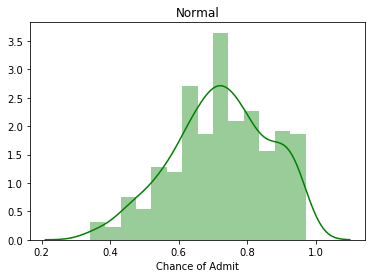

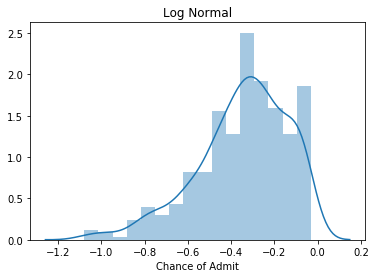

In [18]:
y = df['Chance of Admit']
y_skew = y.skew()
ylog_skew = np.log(y).skew()
y_kurt = y.kurtosis()
ylog_kurt = np.log(y).kurtosis()
print('Acceptable skew range -1 to 1, current:',y_skew)
print('Acceptable skew range -1 to 1, log:',ylog_skew)
print('Acceptable kurtosis range -2 to 2, current:',y_kurt)
print('Acceptable kurtosis range -2 to 2, log:',ylog_kurt)

plt.figure(1);plt.title('Normal')
sns.distplot(y,color='g')

plt.figure(2);plt.title('Log Normal')
sns.distplot(np.log(y))
plt.show()

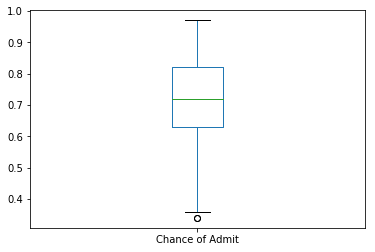

In [19]:
df['Chance of Admit'].plot.box()

## Observing the independant variables

### Univariate analysis

#### Categorical columns

In [20]:
cat_columns

['University Rating', 'SOP', 'LOR', 'Research']

Checking and removing outliers in the data

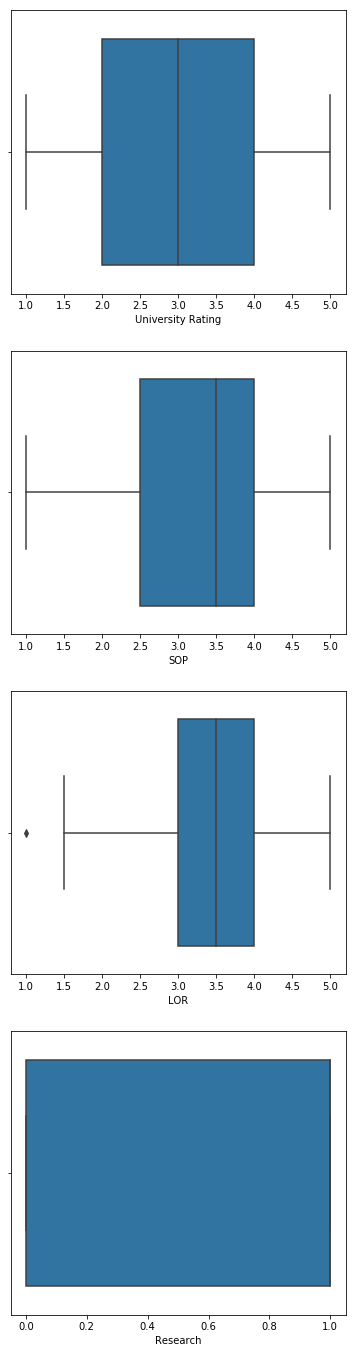

In [21]:
n_cat_cols = len(cat_columns)
fig,ax = plt.subplots(n_cat_cols,figsize=(6,6*n_cat_cols))

for i,col_name in enumerate(cat_columns):
    plt.subplot(ax[i])
    sns.boxplot(data=df,x=col_name)
plt.show()   

An outlier was spotted only in the LOR column (in the left side of plot), we will treat that using IQR method.

In [22]:
df['LOR']

0      4.5
1      4.5
2      3.5
3      2.5
4      3.0
      ... 
495    4.0
496    5.0
497    5.0
498    5.0
499    4.5
Name: LOR, Length: 500, dtype: float64

In [23]:
df.iloc[347]

GRE Score            299.00
TOEFL Score           94.00
University Rating      1.00
SOP                    1.00
LOR                    1.00
CGPA                   7.34
Research               0.00
Chance of Admit        0.42
High Chance            0.00
Name: 347, dtype: float64

In [24]:
q1 = df['LOR'].quantile(q=0.25)
q3 = df['LOR'].quantile(q=0.75)

lower_limit = q1 - (q3-q1)*1.5
df['LOR'].loc[df['LOR'] < lower_limit] = np.NaN
# I checked the forward value and it is 2, so it will be safe to replace with forward fill

In [25]:
df['LOR'].fillna(method="ffill",inplace=True)

To get an idea of data distribution, lets check each categorical columns per category. 

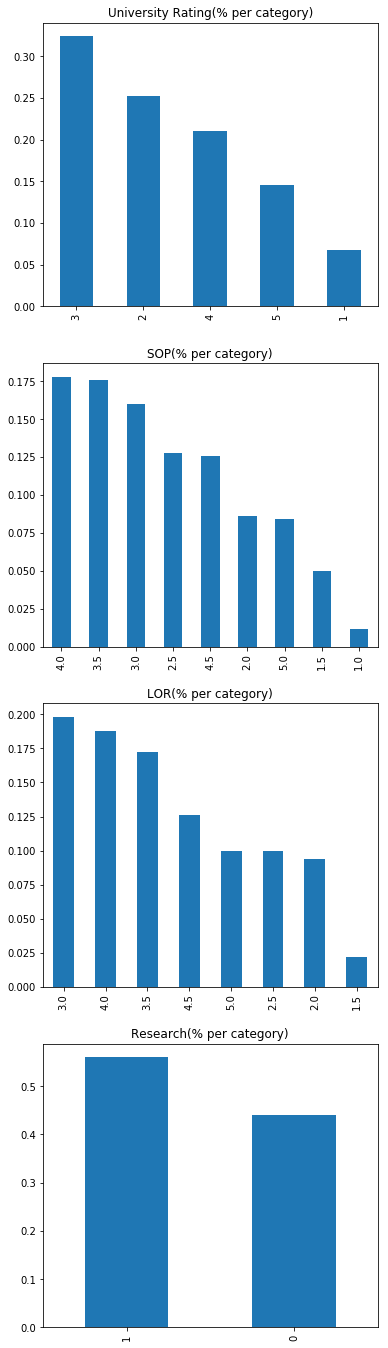

In [26]:
fig,ax = plt.subplots(n_cat_cols,figsize=(6,6*n_cat_cols))


for i,col_name in enumerate(cat_columns):
    plt.subplot(ax[i])
    df[col_name].value_counts(normalize=True).plot.bar(title=col_name+"(% per category)")
plt.show()

#### Numeric columns

In [27]:
num_columns

['TOEFL Score', 'GRE Score', 'CGPA', 'Chance of Admit']

In [28]:
# Since Chance of Admit is target, removing it from the num_columns
num_columns.remove('Chance of Admit')
num_columns

['TOEFL Score', 'GRE Score', 'CGPA']

**Check numerical columns for outliers

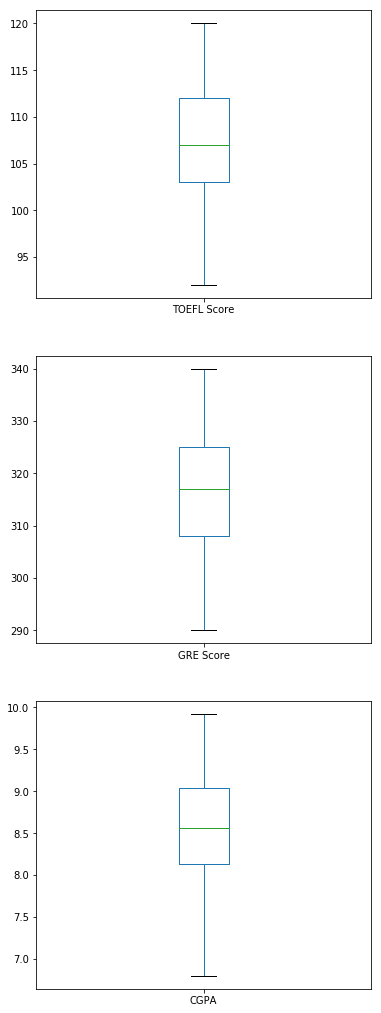

In [29]:
n_num = len(num_columns)
fig,ax = plt.subplots(n_num,figsize=(6,6*n_num))
for i,col_name in enumerate(num_columns):
    plt.subplot(ax[i])
    df[col_name].plot.box()
plt.show()

Since the numerical columns are not having any outliers we can directly move on to the analysis.

#### GRE Score

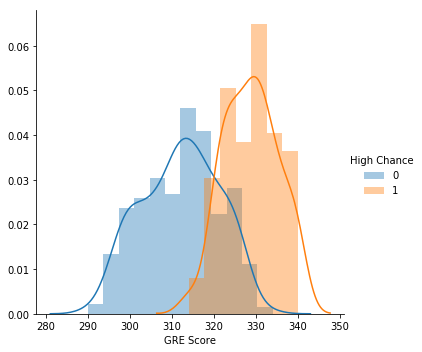

In [30]:
sns.FacetGrid(df,hue='High Chance',height=5)\
    .map(sns.distplot,'GRE Score')\
    .add_legend()
plt.show()

#### TOEFL Score

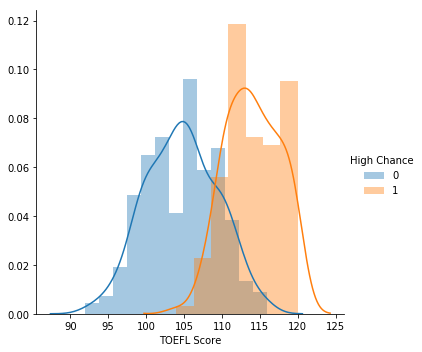

In [31]:
sns.FacetGrid(df,hue='High Chance',height=5)\
    .map(sns.distplot,'TOEFL Score')\
    .add_legend()
plt.show()

#### CGPA

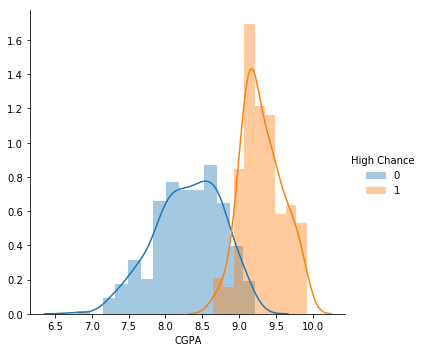

In [32]:
sns.FacetGrid(df,hue='High Chance',height=5)\
    .map(sns.distplot,'CGPA')\
    .add_legend()
plt.show()

The higher the PDF(probability distribution function) of two classes be separated from each other the more likely the feature will help in predicting the output (Chance of Admit).

And from the above diagrams, it can be seen that CGPA has the most separation. Which implies CGPA will be the most prominent factor determining a high chance of admit.

### Bivariate analysis

In [33]:
n_cat_cols,cat_columns

(4, ['University Rating', 'SOP', 'LOR', 'Research'])

#### Categorical v/s Conitnuous

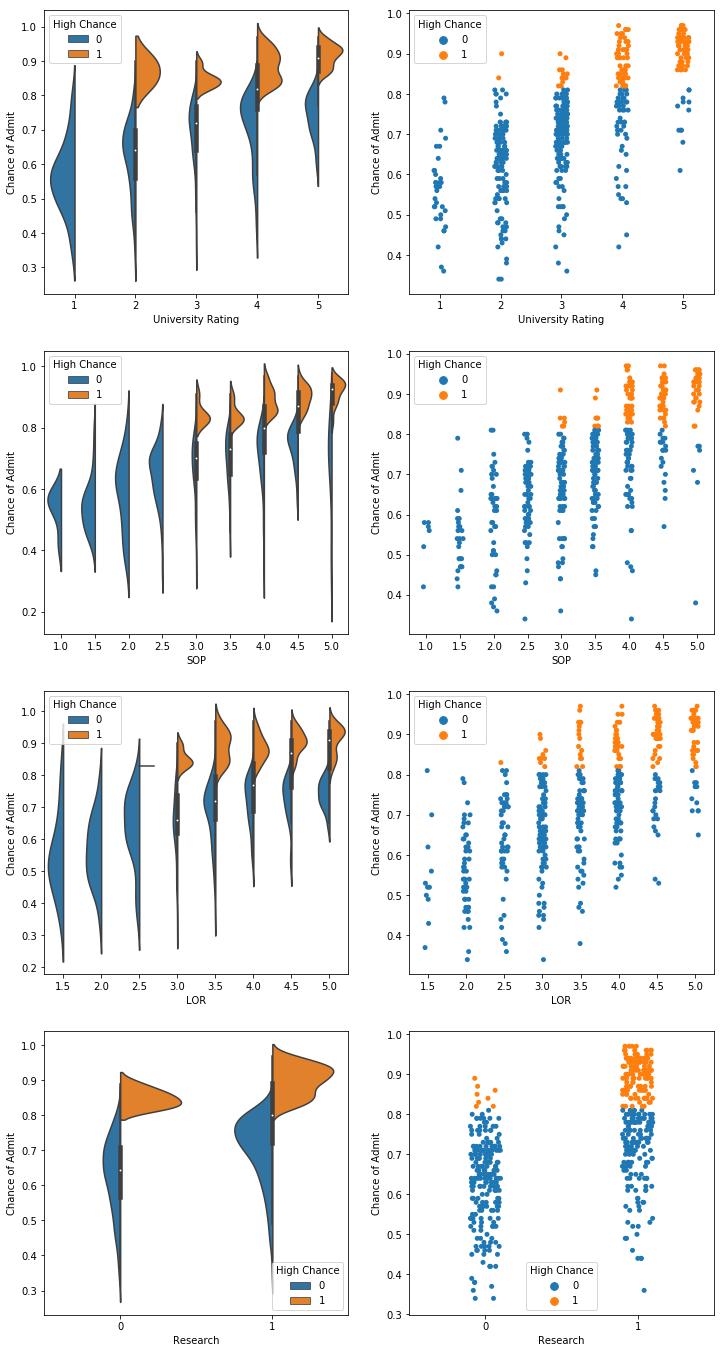

In [34]:
fig,ax = plt.subplots(n_cat_cols,2,figsize=(12,6*n_cat_cols))
for i,col_name in enumerate(cat_columns):
    plt.subplot(ax[i,0])
    sns.violinplot(data=df,x=col_name,y='Chance of Admit',hue="High Chance",split=True)
    plt.subplot(ax[i,1])
#     sns.countplot(data=df,x=col_name,hue="High Chance")
    sns.stripplot(data=df,x=col_name,y='Chance of Admit',hue="High Chance",jitter=True)

plt.show()

The following insights can be extracted to maximize the chance of admit:
- **University Rating**: It shows that if a student's University rating is good, the chance of admit increases. A student who studied in a university with rating 4 or 5 has a higher chance.
- **SOP**: An SOP score more than 4 will be fine. But,4.5 or 5 will be the most favorable ones.
- **LOR**: Higher chance is seen for candidates with score more than 4.5.
- **Research**: Having published a paper doesnt provide a strong indicator than you will get accepted. 

### Continuous v/s Continuous

In [35]:
n_num,num_columns

(3, ['TOEFL Score', 'GRE Score', 'CGPA'])

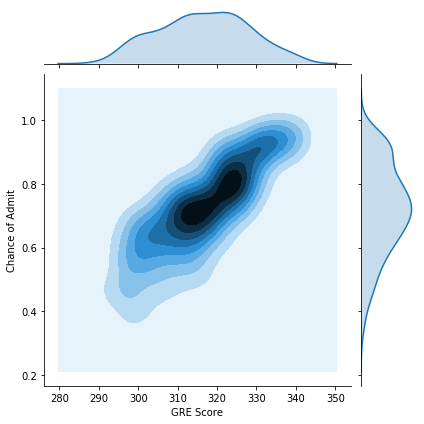

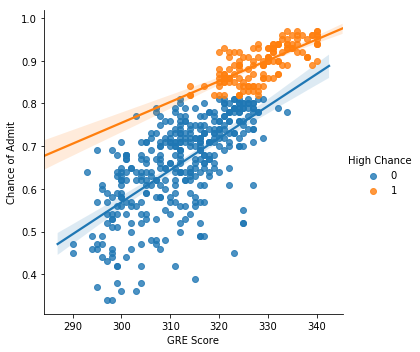

In [36]:
sns.jointplot(data=df,x="GRE Score",y='Chance of Admit',kind="kde")
sns.lmplot(data=df,x="GRE Score",y='Chance of Admit',hue="High Chance")
plt.show()

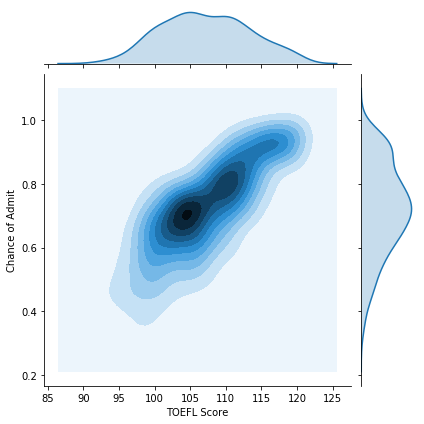

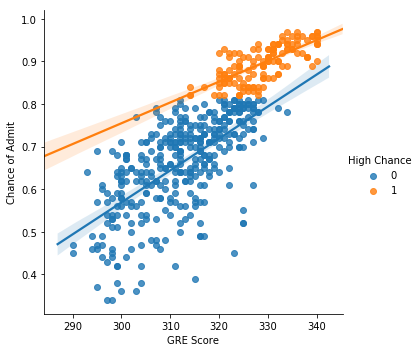

In [37]:
sns.jointplot(data=df,x="TOEFL Score",y='Chance of Admit',kind="kde")
sns.lmplot(data=df,x="GRE Score",y='Chance of Admit',hue="High Chance")
plt.show()

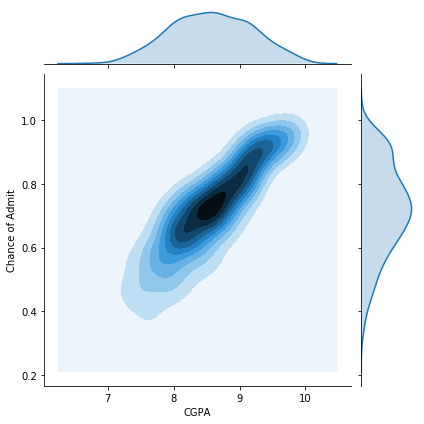

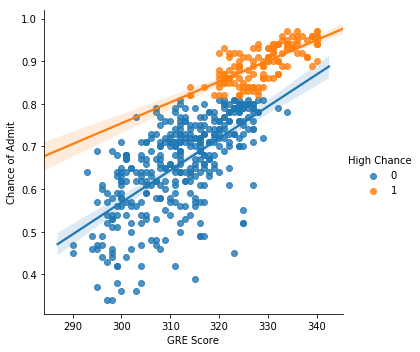

In [38]:
sns.jointplot(data=df,x="CGPA",y='Chance of Admit',kind="kde")
sns.lmplot(data=df,x="GRE Score",y='Chance of Admit',hue="High Chance")
plt.show()

Now let us compare the relationship between 
- GRE Score and TOEFL Score
- GRE Score and CGPA
- CGPA and TOEFL Score

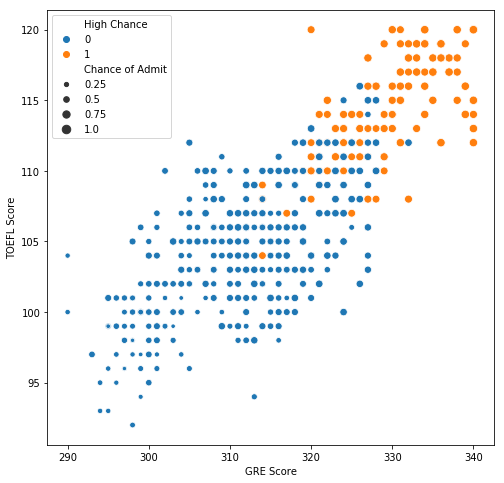

In [39]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(data=df,x="GRE Score",y='TOEFL Score',size="Chance of Admit",hue="High Chance")

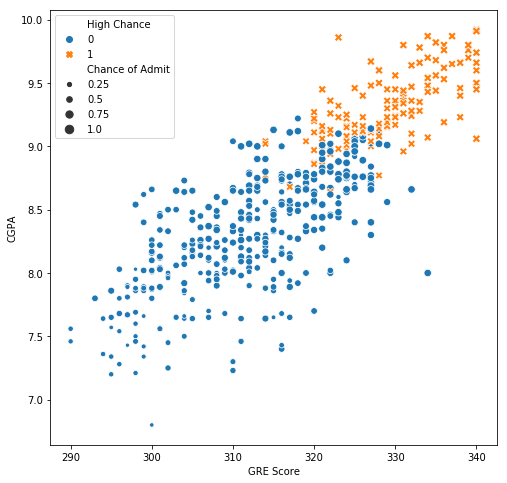

In [40]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(data=df,x="GRE Score",y='CGPA',size="Chance of Admit",hue="High Chance",style="High Chance")

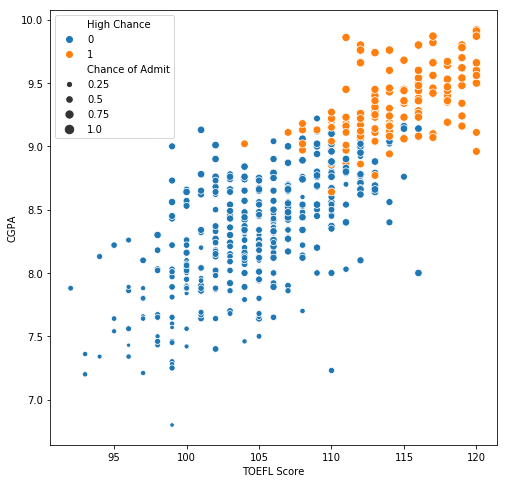

In [41]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(data=df,x="TOEFL Score",y='CGPA',size="Chance of Admit",hue="High Chance")

### Categorical v/s Categorical

In [42]:
# Create a cross table for stacked graph
pd.crosstab(df['University Rating'],df['High Chance'])

High Chance,0,1
University Rating,,
1,34,0
2,124,2
3,148,14
4,49,56
5,12,61


In [43]:
ct = pd.crosstab(df['University Rating'],df['High Chance'],normalize="index")
ct

High Chance,0,1
University Rating,,
1,1.000000,0.000000
2,0.984127,0.015873
3,0.913580,0.086420
4,0.466667,0.533333
5,0.164384,0.835616


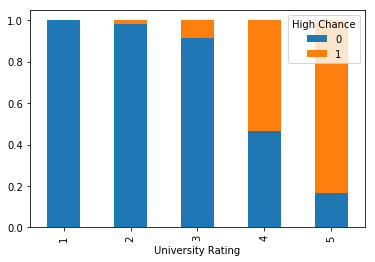

In [44]:
ax = ct.plot.bar(stacked=True)

### Correlation between columns

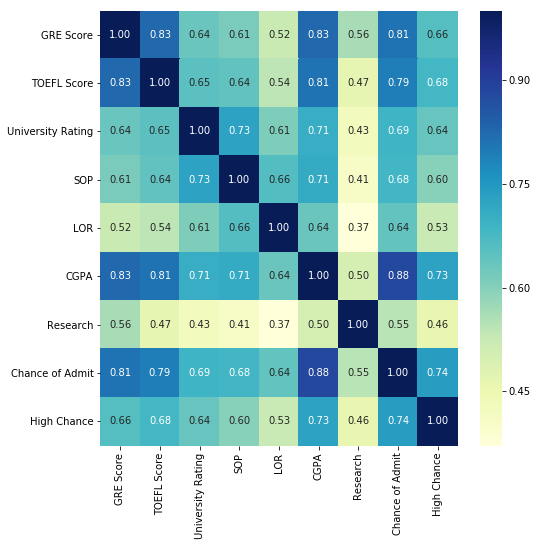

In [45]:
# Removing serial no. and checking correlation.
fig,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), ax=ax, annot=True, fmt= '.2f',cmap="YlGnBu")
plt.show()

From the map, we can see that the target `Chance of Admit` has the most linear relation with the following :
<br/>

Columns | Corelation 
---|---
CGPA | 0.88
GRE Score | 0.81
TOEFL | 0.79

<br/>
The least correlated featues is `Research` .

### Pair Plot

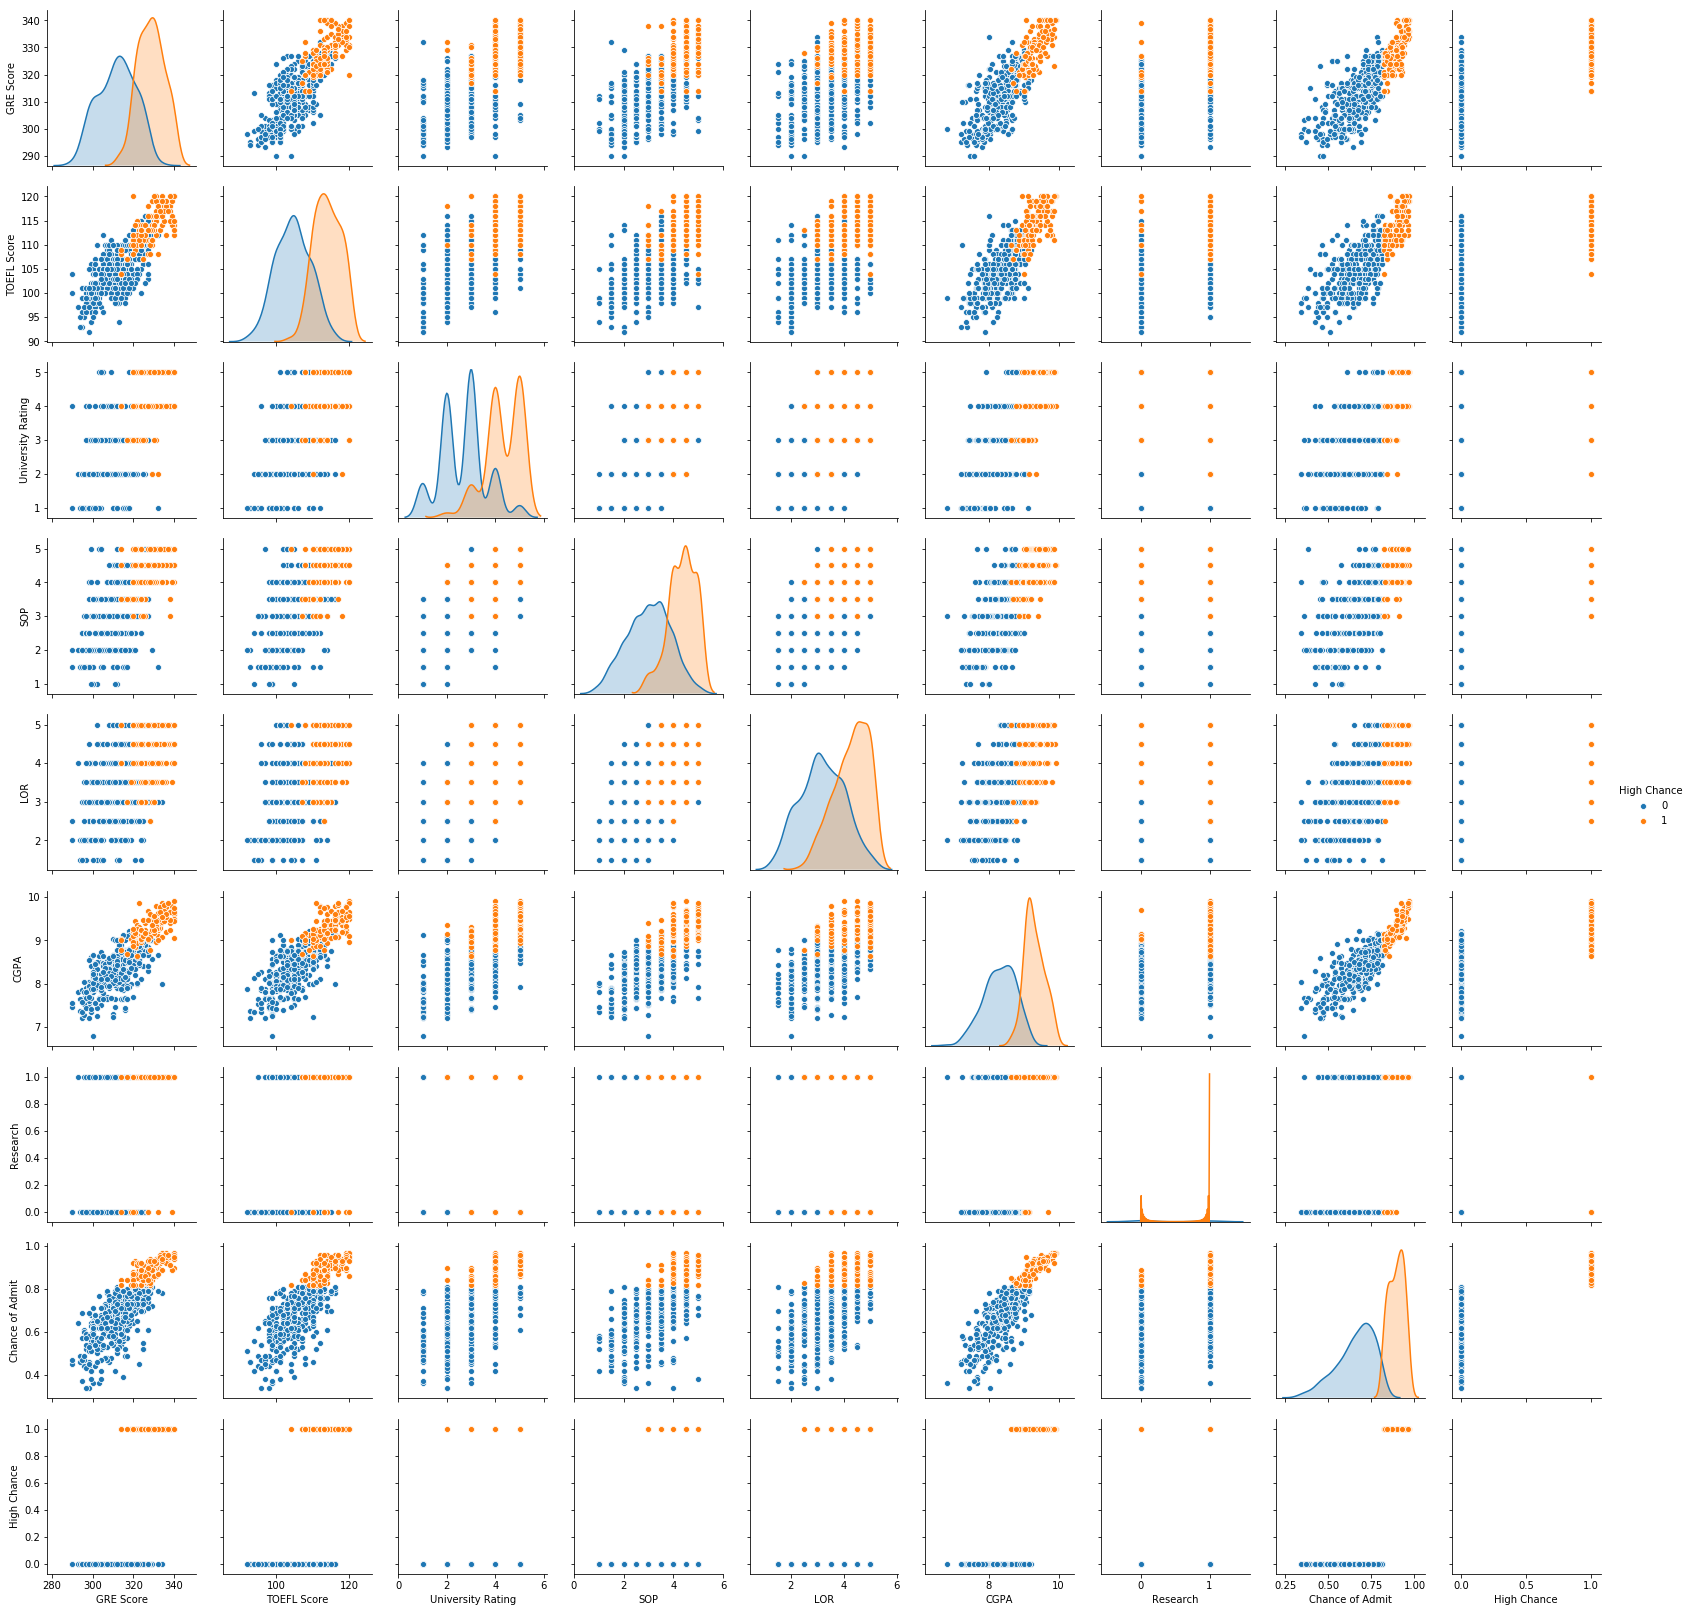

In [46]:
ax = sns.pairplot(df,hue="High Chance")